In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jan 27 2021 12:10:08CET



## Load of the test data

In [3]:
regen_data = False

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 50)
    savedata(regr_data, "../data/regression/100.csv")
    savedata(class_data, "../data/classifier/100.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("../data/regression/100.csv")
    class_data = loaddata("../data/classifier/100.csv")

In [6]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

In [7]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

In [8]:
xc_test.shape

(124064, 10)

In [9]:
xr_test.shape

(62032, 6)

## Model Build

In [10]:
from tensorflow import keras 

In [11]:
model_regr = keras.models.load_model('../models/regression/large_mse.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-100.h5')

## Test of the Classification NN

In [12]:
model_class.fit(xc_test, yc_test)

3877/3877 [==============================] - 4s 1ms/step - loss: 0.1871 - accuracy: 0.9367


## Test of the Regression NN

In [13]:
model_regr.fit(xr_test, yr_test)

1939/1939 [==============================] - 4s 2ms/step - loss: 7.6367e-06 - mae: 0.0022


## Test spectrum

In [14]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [15]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

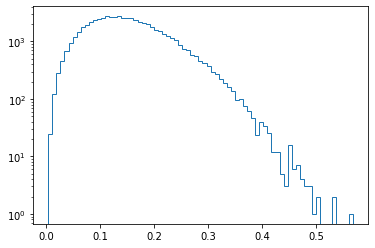

In [16]:
energy_spectrum(final_e, 75)

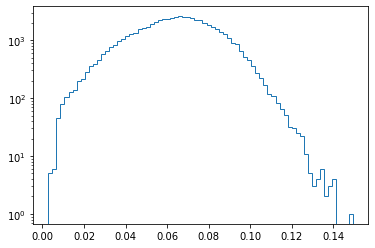

In [17]:
energy_spectrum(final_p, 75)

In [18]:
photon_final_nn = []
threshold = 0.5
for i, x in enumerate(xc_test[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(xc_test) * 100))
    x = np.array([x])
    classification = model_class.predict(np.stack(x))
    if classification >= threshold:
        regr_x = np.array([x[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.08060355945318545%


In [19]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(1*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

[==============================================================] 100% of 124064


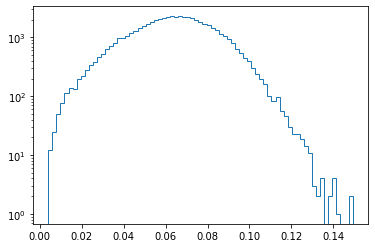

In [20]:
energy_spectrum(photon_final_nn, 75)

In [21]:
photon_final_nn

[0.054770045,
 0.08408489,
 0.024260968,
 0.051879436,
 0.06695485,
 0.04064732,
 0.06296468,
 0.046880413,
 0.09379687,
 0.0866931,
 0.06931973,
 0.09926335,
 0.07344314,
 0.07095418,
 0.068084285,
 0.0764539,
 0.06606264,
 0.062126786,
 0.11229604,
 0.04700142,
 0.077046245,
 0.09658734,
 0.0646768,
 0.0819176,
 0.064207844,
 0.05976956,
 0.045914922,
 0.11057716,
 0.06508298,
 0.054212406,
 0.06479562,
 0.08383985,
 0.0949919,
 0.07651681,
 0.07132773,
 0.039446574,
 0.07630457,
 0.082124606,
 0.07494047,
 0.059083838,
 0.10350477,
 0.059399646,
 0.04914898,
 0.06278567,
 0.055411674,
 0.040178947,
 0.03616836,
 0.047635674,
 0.05211858,
 0.05905408,
 0.06963032,
 0.09463693,
 0.04242038,
 0.058443885,
 0.070335194,
 0.07842734,
 0.070036806,
 0.07206576,
 0.042982325,
 0.08410477,
 0.08574724,
 0.055224974,
 0.06485494,
 0.04409738,
 0.08293744,
 0.100503795,
 0.04700756,
 0.07006039,
 0.055909064,
 0.08889503,
 0.05877365,
 0.056766376,
 0.054954585,
 0.05843477,
 0.077857874,
 0.

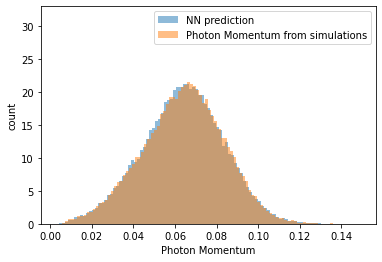

In [24]:
plt.hist(photon_final_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 33))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


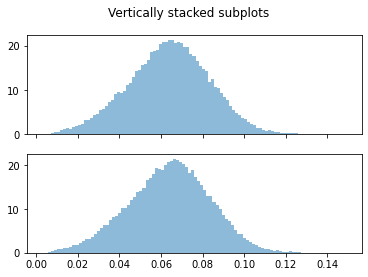

In [25]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()